# Evaluation Metrics

### Learning Objectives:
- [Evaluation metrics: why do we need them?](#Evaluation-metrics:-why-do-we-need-them?)
- [Classification Metrics](#Classification-Metrics)
- [Regression Metrics](#Regression-Metrics)
- [Extra: ROC & AUC](#Extra:-ROC-&-AUC)

## What are they?

> __Evaluation metrics__, as the name suggests, are metrics used to measure the performance of a model or algorithm. 

There are tons of evaluation metrics out there. Certain metrics can only be used for certain types of models and different metrics can be used to evaluate different aspects of performance. 

Therefore, the optimal metric will vary depending on:
- your model
- your data
- your end goal

## Why do we need them?

Why do we need these metrics in the first place? Well, building models works on a constructive feedback principle. 

We build a model, get feedback from metrics, make improvements and carry on until we have reached our desired performance. 

By evaluating our model over multiple (appropriate) metrics, we can ensure that:
- it is robust
- tune it in multiple ways

## Isn't loss enough?

> loss is rarely taken as main metric in machine learning tasks

Loss allows us to learn things we are really after and often works as a proxy for our real goal.

> always check the loss, but do not rely only on it

Human assesment of performance is still needed, sometimes loss can be abruplty large and yet the model works great for our task (GANs would be an example)

On other occasions loss is minimal but the model is not doing what we wanted (reinforcement learning and wrong reward function)

# Classification Metrics

## Accuracy

In any classification problem, we aim to predict the category of a given observation based on the general properties of a training data set. 

In this context, the simplest way to measure performance, whether with binary or multiclass classification, is to measure the number of correct predictions out of all the whole dataset.

> Accuracy - how many predictions were accurate out of all predictions

## Exercise

Create `accuracy` function which takes the `reduction` function (set it with default value `= np.mean`) and apply it on `vector` which is `labels` equal to `targets`:

In [2]:
import numpy as np


def accuracy(labels, targets, reduction=np.mean):
    return reduction(labels == targets)


targets = np.random.randint(0, 10, size=100)
labels = np.random.randint(0, 10, size=100)

accuracy(labels, targets)

0.15

### Traits of accuracy

- can be calculated the same way for any classification task
- the higher the better

## Problems with accuracy

Accuracy, although helpful, is useless in some cases.

Let's imagine our dataset has `10` positive labels and `90` negative. If we always predict negative labels, we get `90%` accuracy.

Let's go over that in our code:

In [3]:
targets = np.concatenate((np.zeros(90), np.ones(10)))
predictions = np.zeros(100)

accuracy(predictions, targets)

0.9

This shows us we need to monitor other metrics as well. After all we don't want classifier predicting only zeros to be shown as a solid one!

## Confusion matrix

If we consider out of the two categories one to be 'Positive' and the other to be 'Negative', we can derive evaluation metrics that measure more specific aspects of performance by categorizing the prediction outcome under the following four categories:
- __True positive:__ Where the model predicts the label to be 'Positive' and the true label is 'Positive'
- __True negative:__ Where the model predicts the label to be 'Negative' and the true label is 'Negative'
- __False positive:__ Where the model predicts the label to be 'Positive' and the true label is 'Negative'
- __False negative:__ Where the model predicts the label to be 'Negative' and the true label is 'Positive'

These outcomes can be displayed in tabular form, in what is known as a __confusion matrix,__ as shown below:

![](images/confusion-matrix.png)

[Source:](https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/)

> The values that go in each cell can either be the absolute frequency of that class (e.g. actual number of false positives), or the normalized value (false positives in `[0, 1]` range)

Usually, we go with the first case, though the second one might be useful to compare proportions of each cell.

From this grouping of the possible outcomes of a binary prediction, we can come up with useful metrics which we are about to go over. Let's start with `true positive` calculation:

## True positive

> True positive for binary case is when model predicts `true` and the label is `true`

## Exercise

Code `true_positive` function taking `predictions` and `targets` arguments 

- Use `astype(bool)` on `labels` and `targets`
- Negate any of `labels` / `targets` if needed
- Return `np.sum` with `boolean` and (`&` for numpy)

In [29]:
# We assume they are binary
def true_positive(labels, targets):
    return np.sum(labels.astype(bool) & targets.astype(bool))

true_positive(predictions, targets)

0

## True negative

> True negative for binary case is when model predicts `false` and the label is `false`

## Exercise

Code `true_negative` function taking `predictions` and `targets` arguments 

- Use `astype(bool)` on `labels` and `targets`
- Negate any of `labels` / `targets` if needed
- Return `np.sum` with `boolean` and (`&` for numpy)

In [31]:
# We assume they are binary
def true_negative(labels, targets):
    return np.sum(~labels.astype(bool) & ~targets.astype(bool))

true_negative(predictions, targets)

90

## False positive

> False positive for binary case is when model predicts `true` and the label is `false`

## Exercise

Code `false_positive` function taking `predictions` and `targets` arguments 

- Use `astype(bool)` on `labels` and `targets`
- Negate any of `labels` / `targets` if needed
- Return `np.sum` with `boolean` and (`&` for numpy)

In [6]:
# We assume they are binary
def false_positive(labels, targets):
    return np.sum(~labels.astype(bool) & targets.astype(bool))

false_positive(predictions, targets)

10

## False negative

> False positive for binary case is when model predicts `false` and the label is `true`

## Exercise

Code `false_negative` function taking `predictions` and `targets` arguments 


- Use `astype(bool)` on `labels` and `targets`
- Negate any of `labels` / `targets` if needed
- Return `np.sum` with `boolean` and (`&` for numpy)

In [7]:
# We assume they are binary
def false_negative(labels, targets):
    return np.sum(labels.astype(bool) & ~targets.astype(bool))

false_negative(predictions, targets)

0

## Visualizing confusion matrix

Given the above, we can use `sklearn` `plot_confusion_matrix` to easily see how confusion matrix looks for `breast_cancer` dataset.

Split dataset into `train` & `test` only, fit on train, evaluate prediction on test and plot.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
from sklearn.metrics import plot_confusion_matrix

# Loading in breast cancer data
X, Y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.30, random_state=0
)

True Confusion Matrix:
Normalized Confusion Matrix:


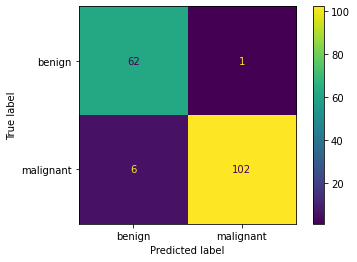

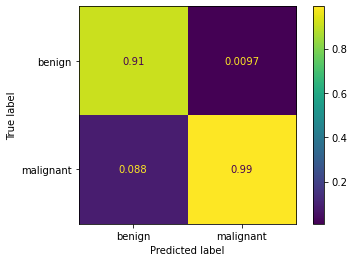

In [9]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Fitting logistic regression model to the data
myLogisticModel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = myLogisticModel.predict(X_test)

# Displaying Confusion matrix
print("True Confusion Matrix:")
plot_confusion_matrix(myLogisticModel, X_test, Y_test, display_labels=["benign", "malignant"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(myLogisticModel, X_test, Y_test, normalize='pred', display_labels=["benign", "malignant"])

## Accuracy again

One can define accuracy using confusion matrix as well

$$ 
\text{Acc} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

Let's use `sklearn` to calculate accuracy metric and compare with our implementation

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy (our):", accuracy(Y_test, y_hat))
print("Accuracy (scikit-learn)", accuracy_score(Y_test, y_hat))

Accuracy (our): 0.9590643274853801
Accuracy (scikit-learn) 0.9590643274853801


According to our first evaluation metric, our model seems to have a good performance.

## Precision

__Precision__ is another commonly used evaluation metric. 

> Precision is a ratio of correctly predicted positives to the total number of predicted positives

$$ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

Precision is the answer to the question: 

> out of all the times we predicted the brain cancer to be malignant, how many times was it actually malignant? 

It is an important measure to have to ensure we evaluate the performance of our model appropriately. 

> __It is a useful metric to consider when false positives are costly.__

For instance, if we are building a system to predict if we should decrease the credit limit on a particular account, we want to be very sure about our prediction or it may result in customer dissatisfaction. In this context, precision is a very relevant measure of performance

### Thought experiment

Consider our current dataset, and assume that `560` of the patients have a benign tumour and 9 patients have a malignant tumour. 

If we create a model that always predicts the tumour to be benign (negative), we get:
- accuracy of $\frac{560}{569} = 98.4\%$, which suggests that our model performed well. We know that the model designed is poor, which once again reflects the fact that accuracy is a poor metric under a non-symmetric distribution for our data. What would the precision in this case be? Since we have no true positives nor false positives, our precision is undefined, which highlights the poor performance of the model. 

__Just as with accuracy, we want precision to be as close to 1 as possible.__

Below, we compute the precision of our model using `numpy` and the in-built function in scikit-learn. 

## Exercise

Code `precision` function taking `(labels, predictions)` arguments (remember to cache `true_positive` value in order not to calculate them twice)

In [11]:
from sklearn.metrics import precision_score
# Computing precision
def precision(labels, predictions):
    tp = true_positive(labels, predictions)
    return tp / (tp + false_positive(labels, predictions))

print("Precision (Python):", precision(Y_test, y_hat))
print("Precision (scikit-learn)", precision_score(Y_test, y_hat))

Precision (Python): 0.9902912621359223
Precision (scikit-learn) 0.9902912621359223


# Recall

Another useful evaluation metric for classification models is the __recall__, also known as __sensitivity__: 

> Recall is the ratio of the correctly predicted positives to the total number of positives in the dataset. It is given by the following equation:

$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

While precision measures how well our model deals with false positives, recall measures how well it deals with false negatives! 

> Together, accuracy, recall and precision are robust metrics for performance evaluation. 

It is a useful measure to consider when false negatives are more costly than false positives. For instance, it is probably better that a tumour is classified as malignant even though it is not, as it will lead to further examination, than if a malignant tumour were to be classified as benign, leading to a sick person not receiving treatment.

## Thought experiment

Consider the same extreme example from earlier with 560 benign tumours and 9 malignant tumours. 

What if now, we create a model that always predicts the tumour to be malignant (positive)?
- accuracy is now given by $\frac{9}{569} = 2\%$
- precision is given by $\frac{9}{569} = 2\%$
- recall now is given by $\frac{9}{9} =100\%$. 

In the previous though-experiment, going with only accuracy would have led us to misjudge the performance of the model, just as now using only recall would have the same effect.

## Exercise

Code `recall` function taking `(labels, predictions)` arguments (remember to cache `true_positive` value in order not to calculate them twice)

In [12]:
from sklearn.metrics import recall_score

def recall(labels, predictions):
    tp = true_positive(labels, predictions)
    return tp / (tp + false_negative(labels, predictions))

print("Recall (Python):", recall(Y_test, y_hat))
print("Recall (scikit-learn)", recall_score(Y_test, y_hat))

Recall (Python): 0.9444444444444444
Recall (scikit-learn) 0.9444444444444444


Which, once again, reflects that our model exhibits a strong performance. Using recall and precision in parallel is already a strong way of evaluation our model on its own. 

> However, as they are two separate measures, we cannot use them directly to compare the performance of one model with another

so instead we must come up with a metric that accounts for both the recall __AND__ precision of our model simultaneously.

![](images/precision_recall.png)

[Source](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

## F1 Score

The $\mathbf{F_{1}}$ __score__, also known as the __F-score__ or __F-measure,__ is a metric that takes what is known as the harmonic mean of our precision and recall. 

Therefore by maximising the F1-score, we are accounting for both precision AND recall simultaneously. It is given as follows:

$$
F_{1} = 2\cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision + recall}} = 
\frac{\text{TP}}{\text{TP} + \frac{1}{2}(\text{FP} + \text{FN})}
$$

Given this measure, we have a robust measure of the performance of our model, which we can use to determine what aspects of our model are lacking, and which models outperforms the others. An extension of the $F_{1}$ score is known as the $F_{\beta}$ score, which for a given value for $\beta$ is given as follows:

$$
F_{\beta} = (1+\beta^{2})\frac{\text{precision} \cdot \text{recall}}{(\beta^{2}\cdot\text{precision) + recall}}
$$

While we will not implement this version of the metric in this class, it can be useful as it enables you to give different weightings to the two metrics depending on the chosen parameter value for $\beta$. 

Depending on the context under which the model will be applied, you will need to optimise for different metrics. For example, when aiming to diagnose whether someone's breast cancer is:
- malignant (positive)
- benign (negative)

it is much better to misdiagnose it as malignant (`False Positive`), which would result in further testing, than to misdiagnose it as benign (`False Negative`), and not treat someone with a deadly condition. In this context, you would choose to minimise the number of false negatives, hence give a higher weighting to your recall than your precision.

Below we implement the $F_{1}$ score with Python as well as with the in-built scikit-learn function.

## Exercise

Code `f1` function taking `(labels, predictions)` arguments (remember to cache `precision` and `recall`)

In [13]:
from sklearn.metrics import f1_score

# Computing F1 score
def f1(labels, predictions):
    p = precision(labels, predictions)
    r = recall(labels, predictions)
    return 2 * (p*r) / (p+r)

print("F1 score (Python):", f1(Y_test, y_hat))
print("F1 score (scikit-learn)", f1_score(Y_test, y_hat))

F1 score (Python): 0.966824644549763
F1 score (scikit-learn) 0.966824644549763


As shown by the four metrics we have used, our model exhibits a relatively high performance across all the different metrics, which reflects the robustness of the model.

But now some of you may be thinking: "How does any of this apply to the case of multiclass classification?". Well, you are in luck, as the same framework as we have seen above can also be applied to non-binary cases. We will demonstrate this using the iris dataset from scikit-learn, which we upload below and fit to a multiclass logistic regression model.

In [14]:
from sklearn.datasets import load_iris

# Loading iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.30, random_state=0
)

In [15]:
# Fitting a logistic regression model to the iris dataset
model = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = model.predict(X_test)

The first thing we need to do is to be able to expand upon our confusion matrix so that it accounts for multiple classes rather than two. 

> We do this by treating each individual class as a simple case of binary classification

Thanks to the in-built tools in scikit-learn, we are able to plot the confusion matrix of our iris dataset and corresponding model.

Confusion matrix
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


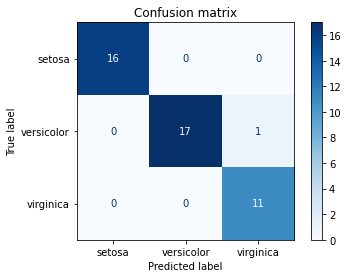

In [16]:
# Visualization of confusion matrix of iris dataset
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = iris.target_names

title = "Confusion matrix"
disp = plot_confusion_matrix(
    model, X_test, Y_test, display_labels=class_names, cmap=plt.cm.Blues
)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

Now with the confusion matrix as a visual-aid, we can __'binarize'__ the problem and treat each class as a binary classification problem. For instance, we can compute the precision when classifying an observation as 'versicolor' or not as $\frac{17}{17} = 100\%$, to be $\frac{16}{16} = 100\%$ for 'setosa' and to be $\frac{11}{11 + 1} = 91.7\%$ for 'virgina'. 

Using these three metrics we can compute the average of the individual precisions to obtain the precision of the multiclassification model! We can generalize this concept and apply to the other metrics encountered. This is the simplest form of computing the multiclass precision and is known as __macro averaging,__ where all metrics have the same weight. For other forms of metric averaging, look [here](https://scikit-learn.org/stable/modules/model_evaluation.html). If we consider a multiclassification model with $N$ possible classes:

$$\text{Accuracy} = \frac{\text{correct predictions}}{\text{all predictions}}$$

$$\text{Precision} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Precision})_{i} $$

$$\text{Recall} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Recall})_{i} $$

The $F_{1}$ score metric can still be computed in terms of the recall and precision. Below we compute the four metrics encountered for our 'irisLogisticModel'. So that this does not become a 'black-box' concept for you, we have computed by hand the precision of our model based on the values on our confusion matrix.

$$\text{Precision} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Precision})_{i} = \frac{1 + 1 + 0.917}{3} = 0.972 $$

> In `sklearn` multiclass and binary metrics work as a single function/class

In [17]:
print("Accuracy:", accuracy_score(Y_test, y_hat))
print("Precision:", precision_score(Y_test, y_hat, average="macro"))
print("Recall:", recall_score(Y_test, y_hat, average="macro"))
print("F1 score:", f1_score(Y_test, y_hat, average="macro"))

Accuracy: 0.9777777777777777
Precision: 0.9722222222222222
Recall: 0.9814814814814815
F1 score: 0.975983436853002


# Regression Metrics

Now that you are familiar with classification metrics, we can go over regression problems, which deal with numerical quantities rather than categorical ones.

This simple fact means that __the same evaluation metrics used in classification cannot be used for regression models__. In classification metrics, we base all metrics on binary concepts such as 'correct' and 'incorrect', then binarize multiclass problems so that the same framework applies. But this does not work with regression models. 

## Example

For instance, under a classification frame of mind, if we predict an output of 3.29742 and the true label is 3.29741, this would be classified as incorrect. What is even worse is that other predictions that are much further away would have the same categorisation. 

Therefore, with regression metrics, __we do not focus on whether something is correct or incorrect, but rather focus on how similar to the true label our prediction is.__

In [18]:
# Loading boston dataset
X, Y = datasets.load_boston(return_X_y=True)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.3, random_state=0
)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(354, 13) (354,) (152, 13) (152,)


In [19]:
# Fitting linear regression model
myLinearModel = LinearRegression().fit(X_train, Y_train)
y_hat = myLinearModel.predict(X_test)

## Mean Squared Error (MSE), Root Mean Squared Error (RMSE) & Mean Absolute Error (MAE)

As seen previously, one metric that can be used to measure the performance of a regression model is the __mean square error (MSE)__.

We are interested in how much the prediction deviates from the label, not whether it's larger or smaller than the label, thus by squaring the errors we ensure that all terms have the same sign and the sum of any two terms can only increase our metric value. 

However, because it is measured in terms of the square of the original unit, a more commonly used evaluation metric is the __root mean square error (RMSE)__, which is the square root of the MSE. This is now measured in the same units as originally and thus becomes easier to interpret. They are given as follows for $N$ examples:

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}$$
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}}$$

## Exercise

Code `MSE` and `RMSE` functions taking `(predicted, targets)` arguments.

__Remember to use `MSE` when computing `RMSE`!__

In [20]:
from sklearn.metrics import mean_squared_error


# Computing MSE and RMSE
def MSE(targets, predicted):
    return np.mean(np.square(targets - predicted))


def RMSE(targets, predicted):
    return np.sqrt(MSE(targets, predicted))


print("MSE (Python):", MSE(Y_test, y_hat))
print("MSE (scikit-learn):", mean_squared_error(Y_test, y_hat))
print()
print("RMSE (Python):", RMSE(Y_test, y_hat))
print("RMSE (scikit-learn):", mean_squared_error(Y_test, y_hat, squared=False))

MSE (Python): 27.195965766883372
MSE (scikit-learn): 27.195965766883372

RMSE (Python): 5.214975145375419
RMSE (scikit-learn): 5.214975145375419


Another deviation from the MSE and RMSE is known as the __mean absolute error (MAE)__, and is, simply put, the mean of the absolute value of the differences between every prediction and label.

It is the most intuitive metric out of the three because all it means is 

> on average, what is the size of our deviation from the true values

Below, we show how it is computed with both Python and scikit-learn.

## Exercise

Code `MAE` function

In [21]:
from sklearn.metrics import mean_absolute_error


# Computing MAE for our Linear Model
def MAE(targets, predicted):
    return np.mean(np.abs(targets - predicted))


print("MAE (Python):", MAE(Y_test, y_hat))
print("MAE (scikit-learn):", mean_absolute_error(Y_test, y_hat))

MAE (Python): 3.6099040603818127
MAE (scikit-learn): 3.6099040603818127


## MAE vs MSE

So which is better: RMSE or MAE? The answer is that it depends on the context. 

- Since we square the errors when computing the RMSE, we are automatically giving a higher weight to larger errors
- MAE only takes their absolute value (so the difference is the same no matter the magnitude)

Consider the dummy example where we are handed a list of 10 errors below, where 2 of them are far larger than the rest.

In [22]:
# Dummy example
errors = np.array([1.0, -2.5, -1.2, 253.4, 5.3, -6.9, -3.2, -100.9, 4.7, 3.3])
print("MAE: ", np.mean(np.abs(errors)))
print("RMSE: ", np.sqrt(np.mean(np.square(errors))))

MAE:  38.24
RMSE:  86.32495583549407


From this dummy example, we can see that larger errors will make the RMSE much larger than MAE. 

In fact, the larger our errors, the larger the RMSE will be in relation to the MAE.

> While the MAE is much more intuitive than the RMSE, the RMSE is quite useful for punishing the model for larger errors. 

Nowadays, since these calculations are not done by hand, there is often no reason why we cannot use both evaluation metrics in parallel.

## R-squared (Coefficient of Determination)

The __R-squared ($\mathbf{R^{2}}$)__ is the the proportion of variance in the output that we are able to predict from the input with our model. 

This evaluation metric is important as it tackles a different aspect of performance from its MSE, RMSE and MAE counterparts. 

> We are interested in how much of the variance in the labels is explained by our model as the variation in our data is representative of the information it contains!

If our model cannot account for the variance in our data, it is not painting the whole picture!

So how can we calculate the $R^{2}$ of our model? The $R^{2}$ is a percentage of the variance from the data that is explained by our model. 
1. compute the variance of the model, which is equal to how much much our data deviates from the simplest possible model: the sample mean
2. compute the mean squared error, which tells us how much the data deviates from our model. We then use the following relationship:

$$
R^{2} = 1 - \frac{MSE}{Var(y)} = 1 - \frac{\sum_{i=1}^{N}(y - \hat{y})^{2}}{\sum_{i=1}^{N}(y - \bar{y})^{2}}
$$

Now we have a measure that will give us 0 if the model explains as much about the variability of the model as the sample mean, and 1 if it explains 100% of the variability in our data. Below we compute the $R^{2}$ using Python as well as with the in-built scikit-learn functions for our linear model.

## Exercise

Code `R2` function. 

__Remember to use `MSE` we came up with previously!__

In [23]:
from sklearn.metrics import r2_score


# Computing R2
def R2(targets, predicted):
    return 1 - (MSE(targets, predicted)/np.var(targets))

print("R2 (Python):", R2(Y_test, y_hat))
print("R2 (scikit-learn):", r2_score(Y_test, y_hat))

R2 (Python): 0.6733825506400175
R2 (scikit-learn): 0.6733825506400175


Now, besides the $R^{2}$, the other three metrics are no longer explained in terms of a percentage. 

How can we interpret our values for MSE, RMSE and MAE? This will depend on the model and the data you are dealing with. If you deviate by 0.7 on a dataset that varies from 0-1000, this is not a large deviation. However, if your data varies from 0-1, 0.7 is a significant deviation from the truth. Therefore, these metrics are useful for comparing different models on the same data. 

> If we would like to compare the performance of two different regression models who's data are on different scales, it may be useful to normalize our evaluation metrics by the range of values in our data.

# Extra: ROC & AUC

We can now discuss one of the most powerful evaluation metrics used for classification: the __Receiver Operator Characteristic (ROC) curve__ and the __Area Under the Curve (AUC).__

By 'fitting' a logistic regression model to our binary classification data, we have already found the optimal __threshold__ for the model. 

> In the case of our example, the threshold is the probability where greater than this probability, we consider the tumour to be malignant, and below it, where the tumour is classified as benign.

However, 'optimal' threhsold may not necessarily give us the optimal model for the problem we are tackling, which is why we need evaluation metrics in the first place. 

Here comes the ROC curve, originaly developed for operators of military radar receivers hence the name, which gives us a visual representation of the performance of our model while operating at different thresholds.

The ROC curve uses __recall__, referred to in this context as __sensitivity__ or __true positive rate__, as well as another quantity, known as __specificity,__ which is the ratio of how many observations were correctly predicted negative to how many observations were actually negative:

$$ 
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

Given this quantity, we can define what is known as the __false positive rate__, which tells you the proportion of observations that were predicted to be malignant when they were actually benign:

$$ 
\text{FPR} = 1-\text{Specificity} = \frac{\text{FP}}{\text{TN} + \text{FP}}
$$

Using these quantities, we can now plot our own ROC curve for our binary classification model, which is the true positive rate versus the false positive rate for all our threshold values tested!

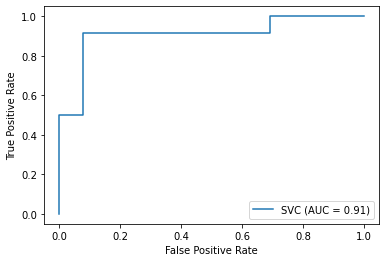

In [24]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0
)

clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

Values for FPR and TPR are taken at different thresholds and computed as points.

We can also see __Area Under the Curve (AUC)__:

> AUC is a measure of area under the rectangle

Intuitively,

> the larger area under the rectangle, the better

This value allows us to easily compare models with maximum value being `1.0`

# Challenges

- How does `true positive` and other from confusion matrix look for multiclass instead of binary?
- Check out [other possible options](https://en.wikipedia.org/wiki/Precision_and_recall) mixing confusion matrix. Implement some of them
- Why ROC Curve always goes up towards the right side edge?
- In our notebook we do multiple passes for precision, recall etc. Can you do that with single pass with `numpy` only?